In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd

year_tag = '2013_2017'

f_path = f'results/{year_tag}/'
n_topic = 8
vocab_path = f'../../../Datasets/model_input_data/vocab_{year_tag}.txt'
npmi_path = f'../../../Datasets/model_input_data/word_word_{year_tag}.npmi'

In [2]:
with open(f_path + f'{n_topic}_w.txt', 'r') as f:
    embedding_lines = f.readlines()

voc = np.genfromtxt(vocab_path, dtype=str)
docs = []
vocab = {}

for i in range(len(voc)):
    vocab[voc[i]] = i

for i in range(len(embedding_lines)):
    emb_str = embedding_lines[i].strip().split()
    values = [float(x) for x in emb_str]
    docs.append(values)
docs = np.array(docs)
emb = np.array(list(zip(*docs)))

In [3]:
vocabs = np.genfromtxt(vocab_path, dtype=str)

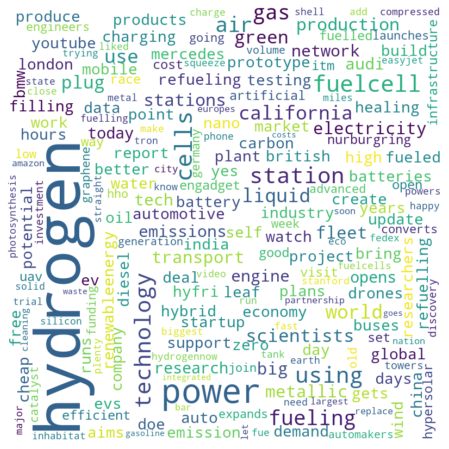

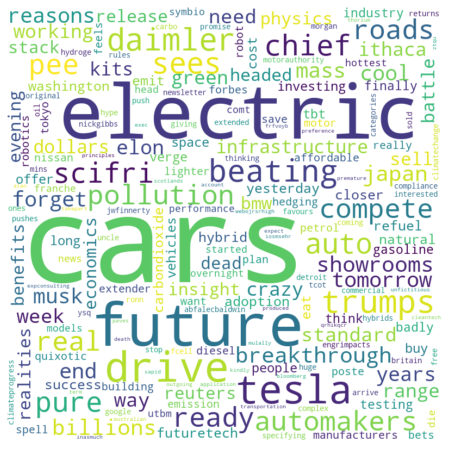

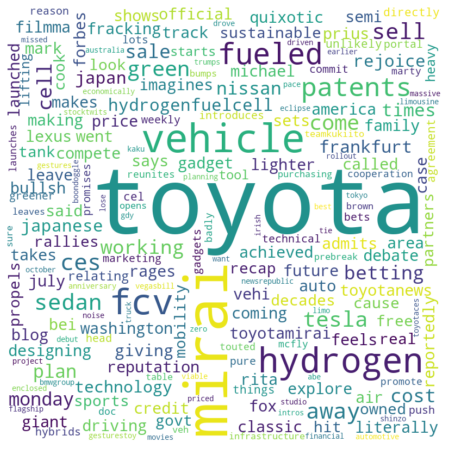

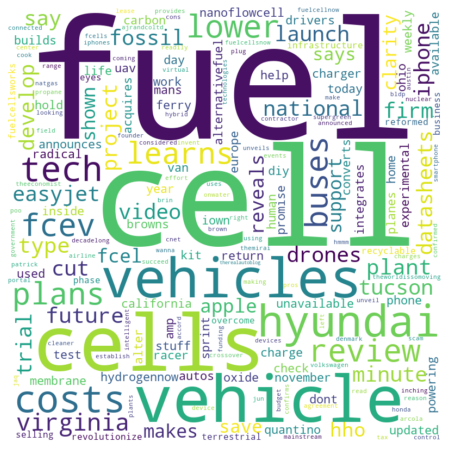

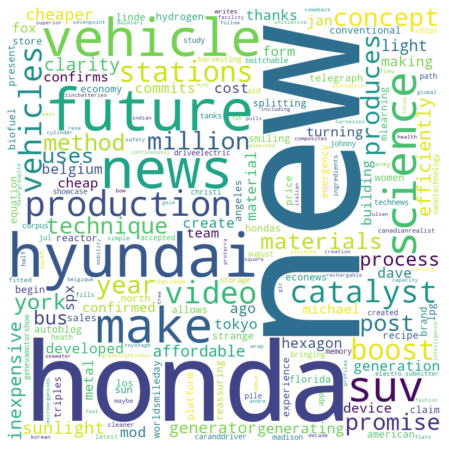

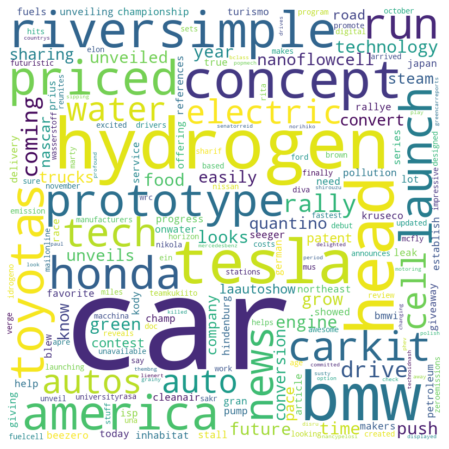

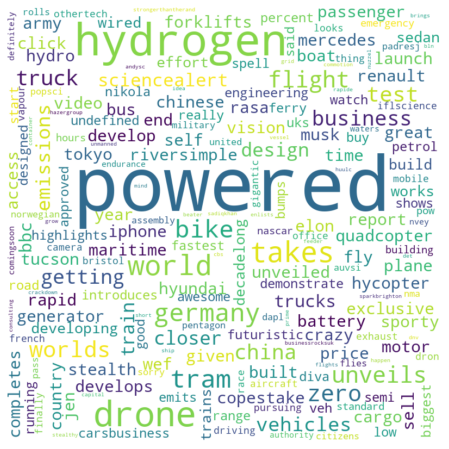

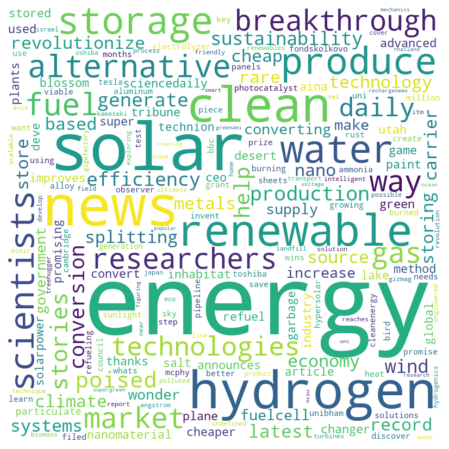

In [4]:
for i in range(8):
    word_weight_dict = dict(zip(vocabs, emb[i]))
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_weight_dict)

    # Display the word cloud
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    # plt.title("Word Cloud")
    plt.show()

In [5]:
mean_npmi_df = pd.DataFrame(data = {
        'k topics': list(np.arange(4, 11)),
        '2013-2017': [0.07, 0.07, 0.09, 0.12, 0.12, 0.10, 0.11],
        '2018-2022': [0.02, 0.02, 0.04, 0.05, 0.06, 0.05, 0.07],
    })


In [6]:
mean_npmi_df

,k topics,2013-2017,2018-2022
0,4,0.07,0.02
1,5,0.07,0.02
2,6,0.09,0.04
3,7,0.12,0.05
4,8,0.12,0.06
5,9,0.10,0.05
6,10,0.11,0.07


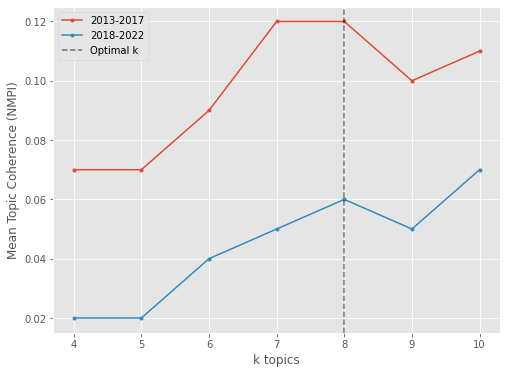

In [28]:
x = mean_npmi_df['k topics']
y_columns = mean_npmi_df.columns[1:]

plt.figure(figsize=(8, 6))
# Create line plots for each column
for column in y_columns:
    y = mean_npmi_df[column]
    plt.plot(x, y, label=column, marker='o', markersize=3)

# Add labels and legend
plt.xlabel('k topics', fontsize=12)
plt.ylabel('Mean Topic Coherence (NMPI)',fontsize=12)
plt.axvline(x=8, color='black', linestyle='--', label='Optimal k', alpha=0.5)
plt.legend()
# Show the plot
plt.show()